In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [46]:
dataset = pd.read_csv("heart_2020_cleaned.csv")

In [47]:
dataset.shape

(319795, 18)

In [48]:
dataset.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [49]:
dataset = dataset[["HeartDisease", "BMI", "Smoking", "AlcoholDrinking", "Sex", "AgeCategory", "PhysicalActivity", "SleepTime", "Diabetic", "Asthma"]]

dataset.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Sex,AgeCategory,PhysicalActivity,SleepTime,Diabetic,Asthma
0,No,16.60,Yes,No,Female,55-59,Yes,5.0,Yes,Yes
1,No,20.34,No,No,Female,80 or older,Yes,7.0,No,No
2,No,26.58,Yes,No,Male,65-69,Yes,8.0,Yes,Yes
3,No,24.21,No,No,Female,75-79,No,6.0,No,No
4,No,23.71,No,No,Female,40-44,Yes,8.0,No,No


In [50]:
nan_features = [f for f in dataset.columns if dataset[f].dtype == object]

for feature in nan_features:
    print(dataset.groupby(feature).mean())

                    BMI  SleepTime
HeartDisease                      
No            28.224658   7.093416
Yes           29.401592   7.136156
               BMI  SleepTime
Smoking                      
No       28.202278   7.133575
Yes      28.500768   7.045084
                       BMI  SleepTime
AlcoholDrinking                      
No               28.392092   7.099041
Yes              27.412704   7.070166
              BMI  SleepTime
Sex                         
Female  28.162436   7.118536
Male    28.505317   7.073380
                   BMI  SleepTime
AgeCategory                      
18-24        25.762770   7.186432
25-29        27.688610   6.986435
30-34        28.440007   6.872660
35-39        28.838634   6.854939
40-44        29.199764   6.876940
45-49        29.487189   6.904043
50-54        29.425097   6.924159
55-59        29.098977   6.965487
60-64        28.821778   7.059105
65-69        28.674776   7.202220
70-74        28.175795   7.306744
75-79        27.597632   7.412

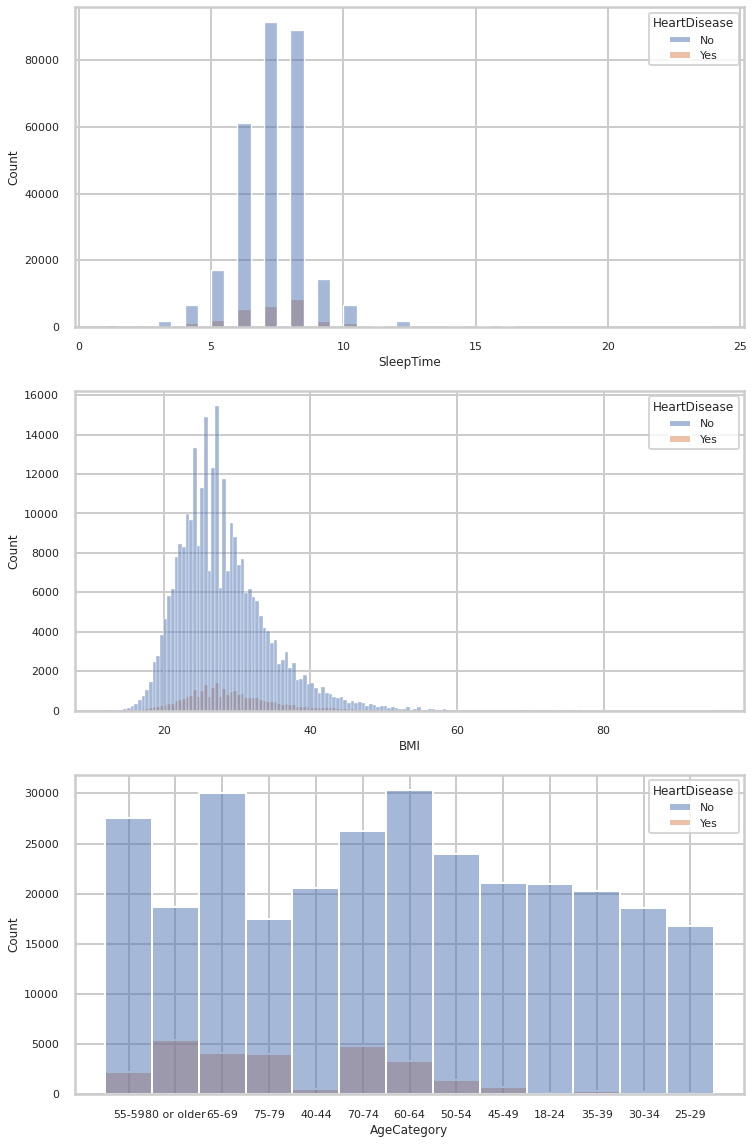

In [51]:
sns.set_theme(context="poster", style="whitegrid", font_scale=0.5)
fig, ax = plt.subplots(3, 1)
fig.set_figheight(20)
fig.set_figwidth(12)

continuous_features = ["AgeCategory", "BMI", "SleepTime"]

for i in range(3):
    if continuous_features:
        sns.histplot(ax=ax[i], x=continuous_features.pop(), data=dataset,hue="HeartDisease", binwidth=.5, color="w")

In [52]:
data = dataset.copy()

yes_no_columns = ["HeartDisease", "Smoking", "AlcoholDrinking", "PhysicalActivity", "Asthma"]

for column in yes_no_columns:
    data[column] = data[column].replace({"Yes": 1, "No": 0})

data["Sex"] = data["Sex"].replace({"Female": 1, "Male": 0})
data["AgeCategory"] = data["AgeCategory"].astype("category").cat.codes
data["Diabetic"] = data["Diabetic"].astype("category").cat.codes

data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Sex,AgeCategory,PhysicalActivity,SleepTime,Diabetic,Asthma
0,0,16.60,1,0,1,7,1,5.0,2,1
1,0,20.34,0,0,1,12,1,7.0,0,0
2,0,26.58,1,0,0,9,1,8.0,2,1
3,0,24.21,0,0,1,11,0,6.0,0,0
4,0,23.71,0,0,1,4,1,8.0,0,0


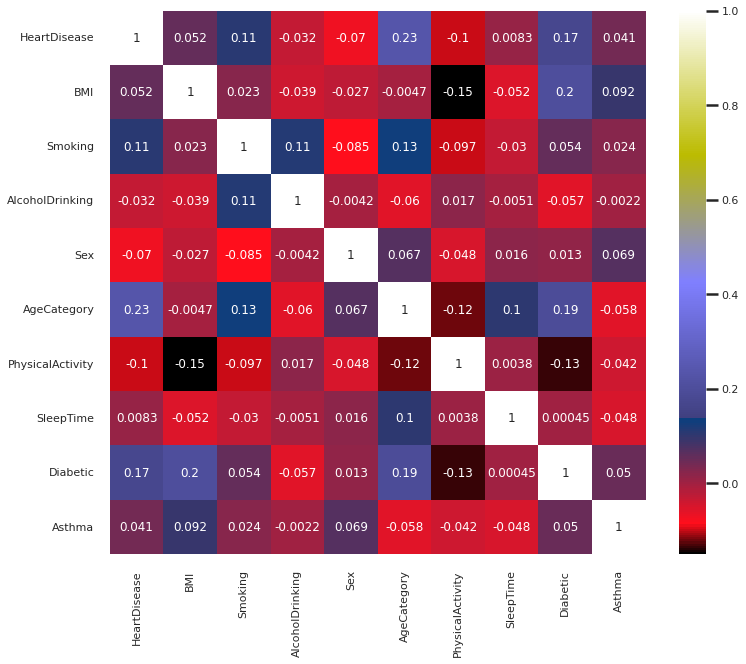

In [53]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), cmap="gist_stern", annot=True)
plt.show()

In [54]:
y = data["HeartDisease"]
X = data.drop("HeartDisease", axis=1)

In [55]:
classification_model = KNeighborsClassifier()

In [56]:
classification_model.fit(X, y)
classification_model.score(X, y)

0.9206898169139605

In [57]:
y_predict = classification_model.predict(X)

print(data["HeartDisease"].value_counts())
uniques, counts = np.unique(y_predict, return_counts=True)
counts

0    292422
1     27373
Name: HeartDisease, dtype: int64


array([312061,   7734])

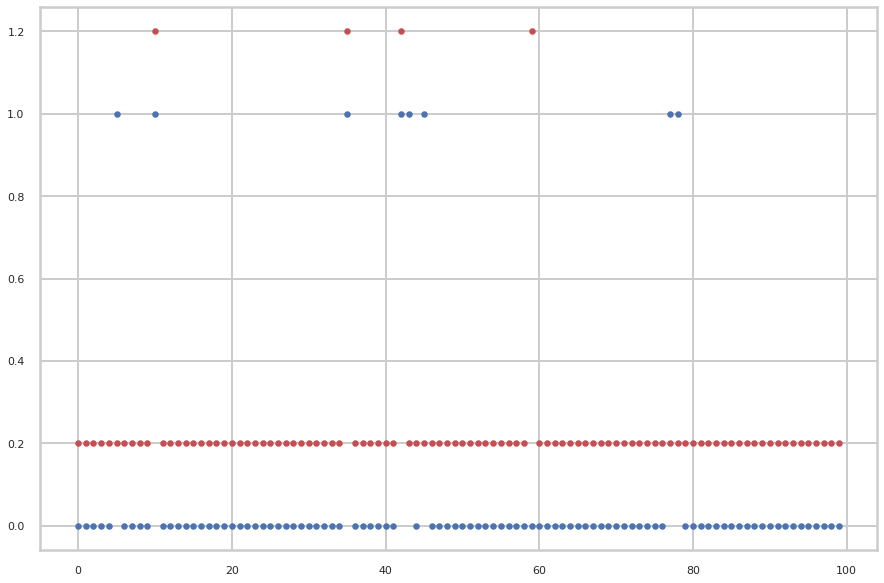

In [58]:
n = 100
s = 20
plt.figure(figsize=(15, 10))
plt.scatter(range(n), data["HeartDisease"].iloc[:n], s=s)
plt.scatter(range(n), (y_predict + 0.2)[:n], s=s, c="r")
plt.show()

In [59]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y[:10000], y_predict[:10000])

array([[8911,  103],
       [ 782,  204]])